In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

import os
import numpy as np
import matplotlib.pyplot as plt
import math
import operator

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
## X_train -> train images
## Y_train -> train labels
## X_test  -> test images
## Y_test  -> test labels

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

170500096/170498071 [==============================] - 140s 1us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

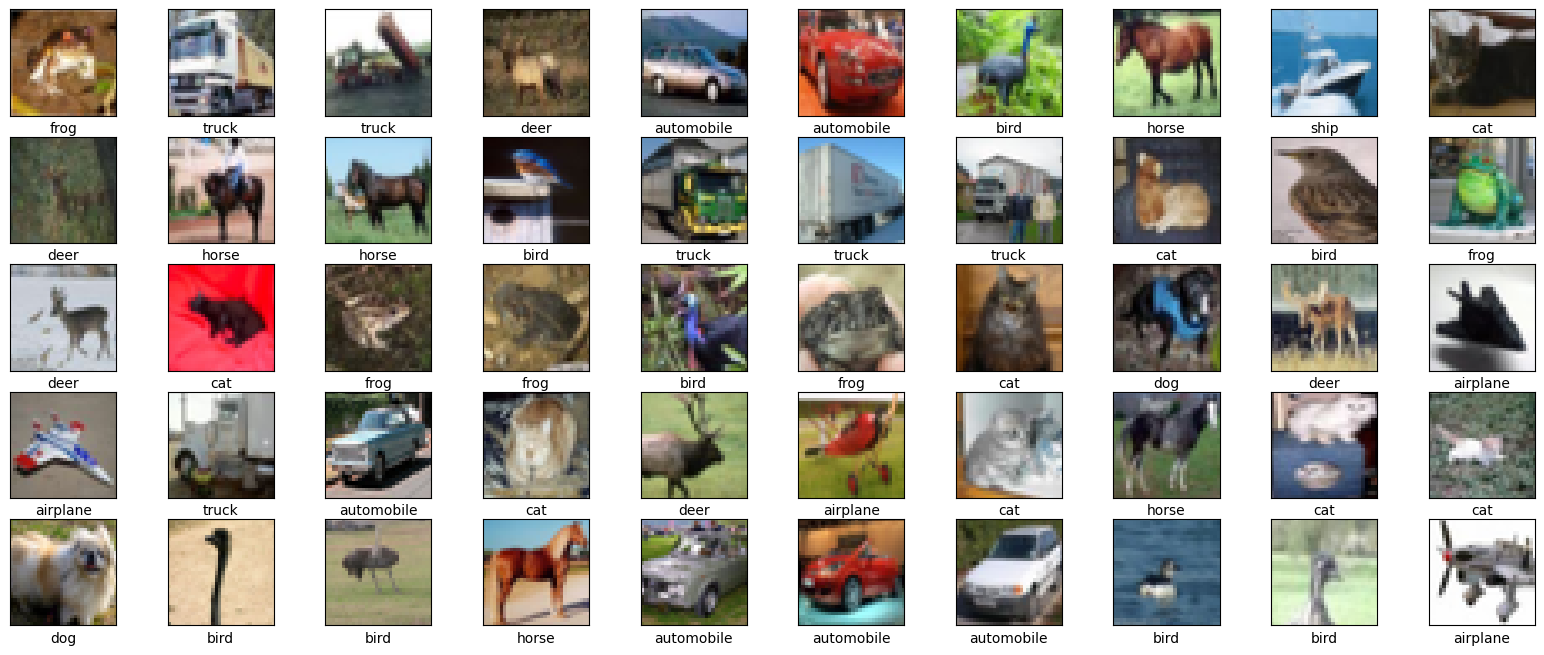

In [4]:
plt.figure(figsize=(20,8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[Y_train[i][0]])

plt.show()

In [4]:
from keras.datasets import cifar10
import numpy as np
import cv2
from tqdm import tqdm

def convert_to_grayscale(images):
    gray_images = []
    for img in tqdm(images):
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        gray_images.append(gray)
    return np.array(gray_images)

X_train_gray = convert_to_grayscale(X_train)
X_test_gray = convert_to_grayscale(X_test)

Using TensorFlow backend.
100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 70089.99it/s]


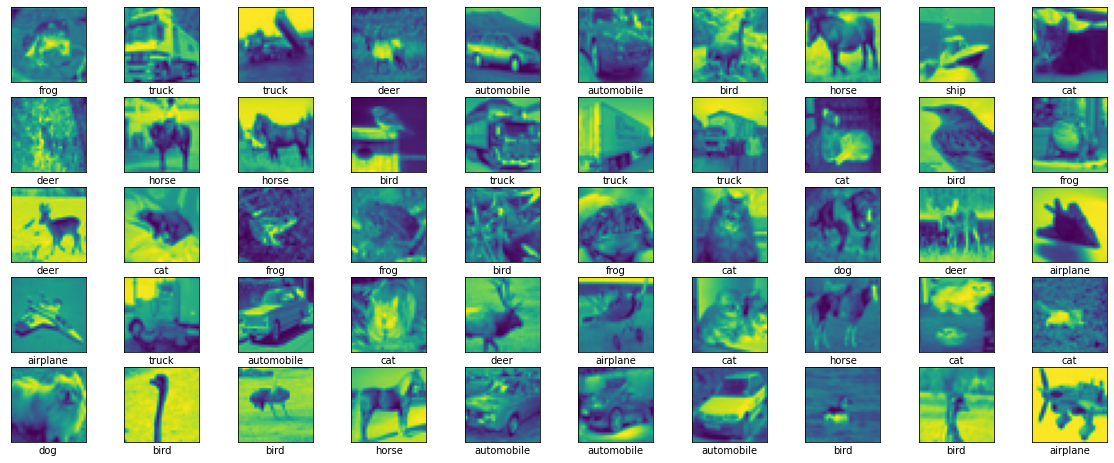

In [5]:
plt.figure(figsize=(20,8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_train_gray[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[Y_train[i][0]])

plt.show()

In [6]:
X_train_gray = X_train_gray.reshape(X_train_gray.shape[0], 32, 32, 1)
X_test_gray = X_test_gray.reshape(X_test_gray.shape[0], 32, 32, 1)

X_train_gray = X_train_gray.astype('float32') / 255
X_test_gray = X_test_gray.astype('float32') / 255


print("Shape of grayscale training set:", X_train_gray.shape)
print("Shape of grayscale test set:", X_test_gray.shape)

Shape of grayscale training set: (50000, 32, 32, 1)
Shape of grayscale test set: (10000, 32, 32, 1)


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

def knn_classification_cv(X_train, Y_train, metric='euclidean', k=5):
    knn_classifier = KNeighborsClassifier(n_neighbors=k, metric=metric)
    scores = cross_val_score(knn_classifier, X_train, Y_train, cv=5)
    avg_accuracy = np.mean(scores)
    return avg_accuracy

In [8]:
K_values = [1, 3, 4, 5, 7, 8]
accuracy_l1_values = []
accuracy_l2_values = []

for k in tqdm(K_values):
    accuracy_l1 = knn_classification_cv(X_train_gray.reshape(len(X_train_gray), -1), Y_train, metric='manhattan', k=k)
    accuracy_l1_values.append(accuracy_l1)
    accuracy_l2 = knn_classification_cv(X_train_gray.reshape(len(X_train_gray), -1), Y_train, metric='euclidean', k=k)
    accuracy_l2_values.append(accuracy_l2)


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]C:\Users\Shuvo\anaconda3\envs\new\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Shuvo\anaconda3\envs\new\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Shuvo\anaconda3\envs\new\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Shuvo\anaconda3\envs\new\lib\site-packages\sklearn

In [9]:
print(accuracy_l1_values)
print(accuracy_l2_values)

'''
print(accuracy_l1_values)=[0.32026, 0.29535999999999996, 0.30388000000000004, 0.30720000000000003, 0.30782, 0.30906]

print(accuracy_l2_values)=[0.29050000000000004, 0.27196, 0.2791600000000001, 0.27814, 0.28124000000000005, 0.28228]
'''

[0.32026, 0.29535999999999996, 0.30388000000000004, 0.30720000000000003, 0.30782, 0.30906]
[0.29050000000000004, 0.27196, 0.2791600000000001, 0.27814, 0.28124000000000005, 0.28228]


In [10]:
import pickle
with open('accuracy_values.pkl', 'wb') as f:
    pickle.dump((accuracy_l1_values, accuracy_l2_values), f)

In [11]:
with open('accuracy_values.pkl', 'rb') as f:
    loaded_accuracy_l1_values, loaded_accuracy_l2_values = pickle.load(f)

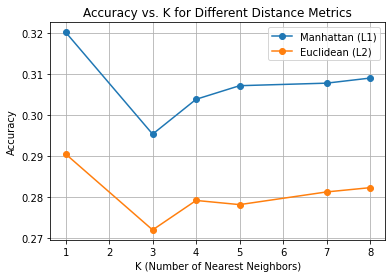

In [12]:
import matplotlib.pyplot as plt

plt.plot(K_values, accuracy_l1_values, marker='o', label='Manhattan (L1)')
plt.plot(K_values, accuracy_l2_values, marker='o', label='Euclidean (L2)')
plt.xlabel('K (Number of Nearest Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K for Different Distance Metrics')
plt.legend()
plt.grid(True)
plt.show()